 https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',index_col='Month')

In [3]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [4]:
milk.index = pd.to_datetime(milk.index)

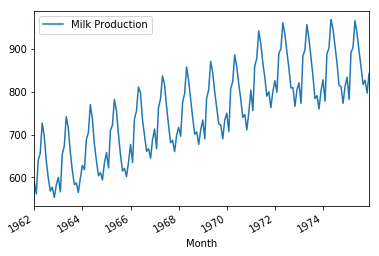

In [5]:
milk.plot()

In [6]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [7]:
train_set = milk.head(156) # here is 168 -12 because of train test set creation

In [8]:
test_set = milk.tail(12)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
train_scaled = scaler.fit_transform(train_set)

In [12]:
test_scaled = scaler.transform(test_set)

In [13]:
def next_batch(training_data,batch_size,steps):
    
    
    #random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    #Y data
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [14]:
import tensorflow as tf

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [15]:

num_inputs = 1
# Num batch
num_time_steps = 12
# neuron layers,
num_neurons = 200
#redicted time series
num_outputs = 1
# learning rate
learning_rate = 0.003 
# how many iterations
num_train_iterations = 4000
# Size of the batch of data
batch_size = 1

In [16]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [17]:

cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

D:\anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [18]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [19]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [21]:
saver = tf.train.Saver()

In [22]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [23]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0 	MSE: 0.17596944
100 	MSE: 0.023116292
200 	MSE: 0.014814331
300 	MSE: 0.009603935
400 	MSE: 0.011217024
500 	MSE: 0.006835802
600 	MSE: 0.006390804
700 	MSE: 0.010243059
800 	MSE: 0.011412916
900 	MSE: 0.005168527
1000 	MSE: 0.009770988
1100 	MSE: 0.0043520406
1200 	MSE: 0.008142356
1300 	MSE: 0.0062942603
1400 	MSE: 0.006939883
1500 	MSE: 0.008390641
1600 	MSE: 0.0020272292
1700 	MSE: 0.008399374
1800 	MSE: 0.005114434
1900 	MSE: 0.006161539
2000 	MSE: 0.0037918612
2100 	MSE: 0.002937203
2200 	MSE: 0.004605582
2300 	MSE: 0.0022503387
2400 	MSE: 0.004579686
2500 	MSE: 0.0059870314
2600 	MSE: 0.0024919272
2700 	MSE: 0.004547417
2800 	MSE: 0.008891654
2900 	MSE: 0.004040905
3000 	MSE: 0.0059146956
3100 	MSE: 0.0045604645
3200 	MSE: 0.007054932
3300 	MSE: 0.0061545265
3400 	MSE: 0.0075148367
3500 	MSE: 0.006091326
3600 	MSE: 0.0013364609
3700 	MSE: 0.0029051222
3800 	MSE: 0.004588801
3900 	MSE: 0.002071648


In [24]:
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


In [25]:
with tf.Session() as sess:
    
    #saveers
    saver.restore(sess, "./ex_time_series_model")


    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [26]:
train_seed

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 0.6158462,
 0.6314672,
 0.7063259,
 0.80111206,
 0.884469,
 0.92208767,
 0.8846097,
 0.81802094,
 0.74657214,
 0.66658133,
 0.6560489,
 0.6405087]

In [27]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [28]:
test_set['Generated'] = results

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
test_set

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,809.192017
1975-02-01 01:00:00,782.0,815.690369
1975-03-01 01:00:00,892.0,846.831604
1975-04-01 01:00:00,903.0,886.262634
1975-05-01 01:00:00,966.0,920.939087
1975-06-01 01:00:00,937.0,936.588440
1975-07-01 01:00:00,896.0,920.997620
1975-08-01 01:00:00,858.0,893.296753
1975-09-01 01:00:00,817.0,863.574036


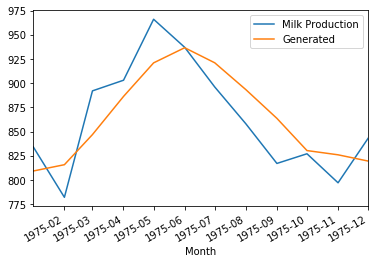

In [30]:
test_set.plot()